<a href="https://colab.research.google.com/github/ChernovaNatalya/ScientificProgramming/blob/main/SolarActivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **30. Аппроксимация данных. Солнечная активность**
http://www.sidc.be/silso/datafiles

Ниже представлены данные по солнечной активности (усредненные числа Вольфа) с 1900 по 2015 гг. Изобразить данные. Подобрать модель, аппроксимирующую их. Построить график полученной аппроксимирующей функции. Можно воспользоваться пребразованием Фурье, чтобы определить частоту колебаний в солнечной активности. На какой ближайший год придется следующий пик солнечной активности?


```
Читать по строкам (1900...2015):
  15.7 4.6 8.5 40.8 70.1 105.5 90.1 102.8 80.9
  73.2 30.9 9.5 6.0 2.4 16.1 79.0 95.0 173.6 134.6
  105.7 62.7 43.5 23.7 9.7 27.9 74.0 106.5 114.7
  129.7 108.2 59.4 35.1 18.6 9.2 14.6 60.2 132.8
  190.6 182.6 148.0 113.0 79.2 50.8 27.1 16.1 55.3
  154.3 214.7 193.0 190.7 118.9 98.3 45.0 20.1 6.6
  54.2 200.7 269.3 261.7 225.1 159.0 76.4 53.4
  39.9 15.0 22.0 66.8 132.9 150.0 149.4 148.0 94.4
  97.6 54.1 49.2 22.5 18.4 39.3 131.0 220.1 218.9
  198.9 162.4 91.0 60.5 20.6 14.8 33.9 123.0 211.1
  191.8 203.3 133.0 76.1 44.9 25.1 11.6 28.9 88.3
  136.3 173.9 170.4 163.6 99.3 65.3 45.8 24.7 12.6
  4.2 4.8 24.9 80.8 84.5 94.0 113.3 69.8
```







Подключение библиотек

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean
%matplotlib inline
import sympy
from scipy.fft import fft, fftfreq

Добавление данных

In [24]:
years = np.arange(1900, 2016)
temperature = np.array([15.7, 4.6, 8.5, 40.8, 70.1, 105.5, 90.1, 102.8, 80.9, 73.2, 30.9, 9.5, 6.0, 2.4, 16.1, 79.0, 95.0, 173.6, 134.6,
  105.7, 62.7, 43.5, 23.7, 9.7, 27.9, 74.0, 106.5, 114.7, 129.7, 108.2, 59.4, 35.1, 18.6, 9.2, 14.6, 60.2, 132.8, 190.6, 182.6, 148.0,
  113.0, 79.2, 50.8, 27.1, 16.1, 55.3, 154.3, 214.7, 193.0, 190.7, 118.9, 98.3, 45.0, 20.1, 6.6, 54.2, 200.7, 269.3, 261.7, 225.1, 159.0,
  76.4, 53.4, 39.9, 15.0, 22.0, 66.8, 132.9, 150.0, 149.4, 148.0, 94.4, 97.6, 54.1, 49.2, 22.5, 18.4, 39.3, 131.0, 220.1, 218.9,
  198.9, 162.4, 91.0, 60.5, 20.6, 14.8, 33.9, 123.0, 211.1, 191.8, 203.3, 133.0, 76.1, 44.9, 25.1, 11.6, 28.9, 88.3, 136.3, 173.9,
  170.4, 163.6, 99.3, 65.3, 45.8, 24.7, 12.6, 4.2, 4.8, 24.9, 80.8, 84.5, 94.0, 113.3, 69.8])

Построение графика

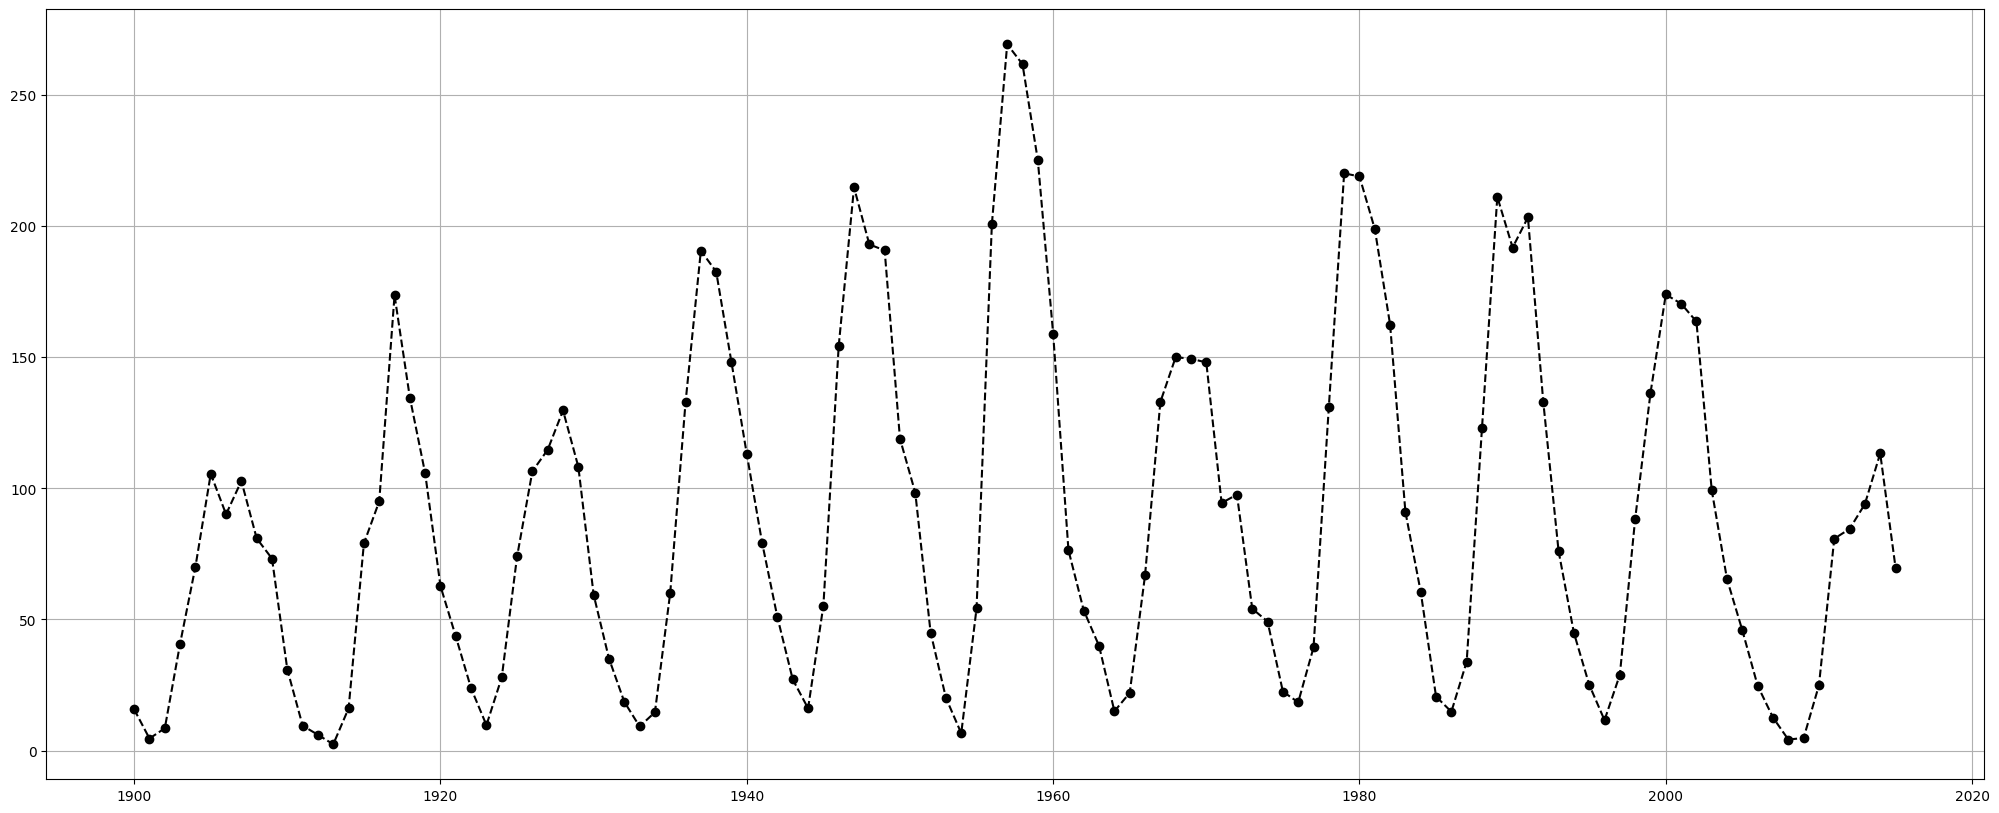

In [25]:
plt.figure(figsize=(25, 10))
plt.plot(years, temperature, "ko--")
plt.grid()
pass

Обратим внимание, что полученный график похож на синусоиду.
Для того, чтобы найти следующий пик солнечной активности, нам необходимо знать период функции. Попробуем найти период двумя способами: с помощью преобразования Фурье и с помощью среднего геометрического.

Воспользуемся преобразованием Фурье для определения частоты колебаний солнечной активности на заданном промежутке и покажем результаты на графике 

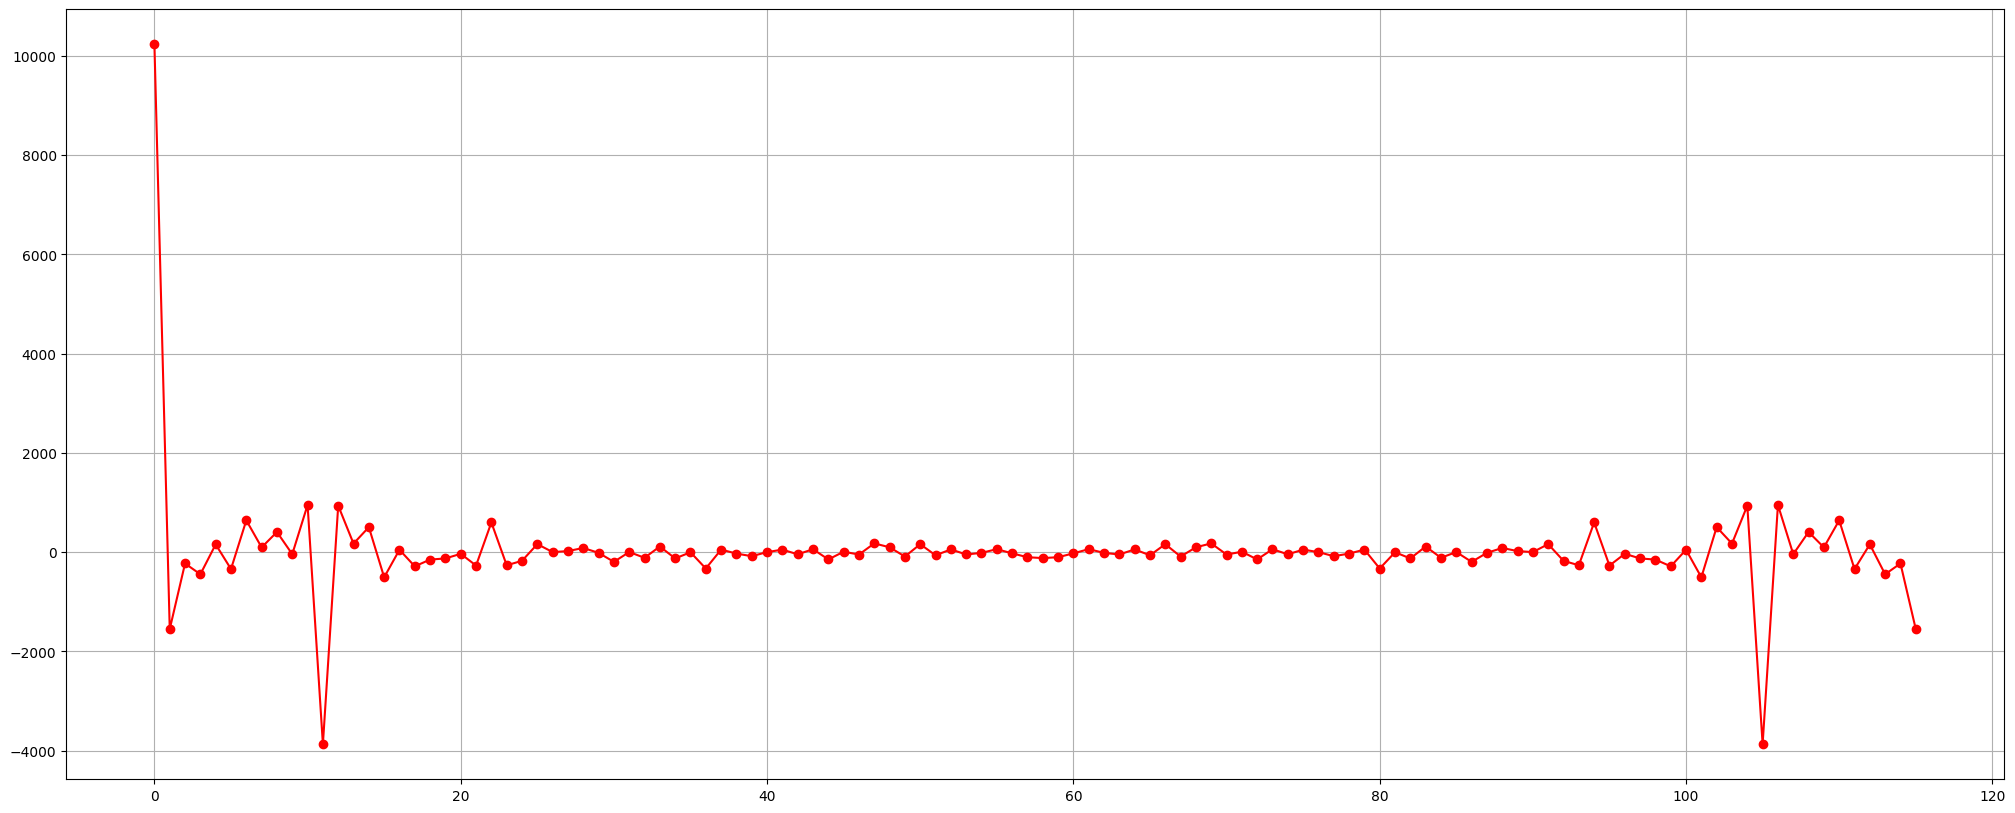

In [26]:
l = len(fft(temperature))
d = [fft(temperature)[i].real for i in range(l)]
plt.figure(figsize=(25, 10))
plt.plot(np.arange(0, 2016-1900), d, "ro-")
plt.grid()
pass

Мы получили график частот колебаний солнечной активности за 116 лет, использовав преобразование Фурье (функция fft() из библиотеки scipy возвращает массив комплексных чисел, но в конкретном случае комплексное число - это только тип данных, так как мнимая часть у каждого значения из массива равна нулю и на практике эти числа используются как действительные). По графику видно, что в точке равной 11 годам происходит значительное отклонение

Определим период колебаний с помощью среднего геометрического. Для этого нам необходимо определить все года с экстремумами солнечной активности.

In [27]:
median = np.median(temperature)
nyears = 2016-1900
min_temperature = min_years = max_temperature = max_years = np.array([])
max = True
for i in range (1, nyears-1):
  if (temperature[i]<temperature[i+1] and temperature[i]<temperature[i-1] and temperature[i]<median and max):
    min_temperature = np.append(min_temperature, temperature[i])
    min_years = np.append(min_years, years[i])
    max = False  
  if (temperature[i]>temperature[i+1] and temperature[i]>temperature[i-1] and temperature[i]>median and not max):
    max_temperature = np.append(max_temperature, temperature[i])
    max_years = np.append(max_years, years[i])
    max = True
print("Года с минимальной солнечной активностью", min_years)
print("Года с максимальной солнечной активностью", max_years)

Года с минимальной солнечной активностью [1901. 1913. 1923. 1933. 1944. 1954. 1964. 1976. 1986. 1996. 2008.]
Года с максимальной солнечной активностью [1905. 1917. 1928. 1937. 1947. 1957. 1968. 1979. 1989. 2000. 2014.]


Определим среднее геометрическое годов с минимальной солнечной активностью

In [28]:
lmin = len(min_years)
min = np.array([])
for i in range(1, lmin):
  min = np.append(min, min_years[i]-min_years[i-1])
print("Среднее геометрическое годов с минимальной солнечной активностью:", gmean(min))

Среднее геометрическое годов с минимальной солнечной активностью: 10.663349463976184


Определим среднее геометрическое годов с максимальной солнечной активностью

In [29]:
lmax = len(max_years)
max = np.array([])
for i in range(1, lmax):
  max = np.append(max, max_years[i]-max_years[i-1])
print("Среднее геометрическое годов с максимальной солнечной активностью:", gmean(max))

Среднее геометрическое годов с максимальной солнечной активностью: 10.82710262271983


Используя преобразование Фурье мы определили период, равный 11 годам, а используя среднее геометрическое мы определили период, равный 10.663349463976184-10.82710262271983 годам. Используя полученные данные, подберём синусоиду, аппроксимирующую первоначальную функцию

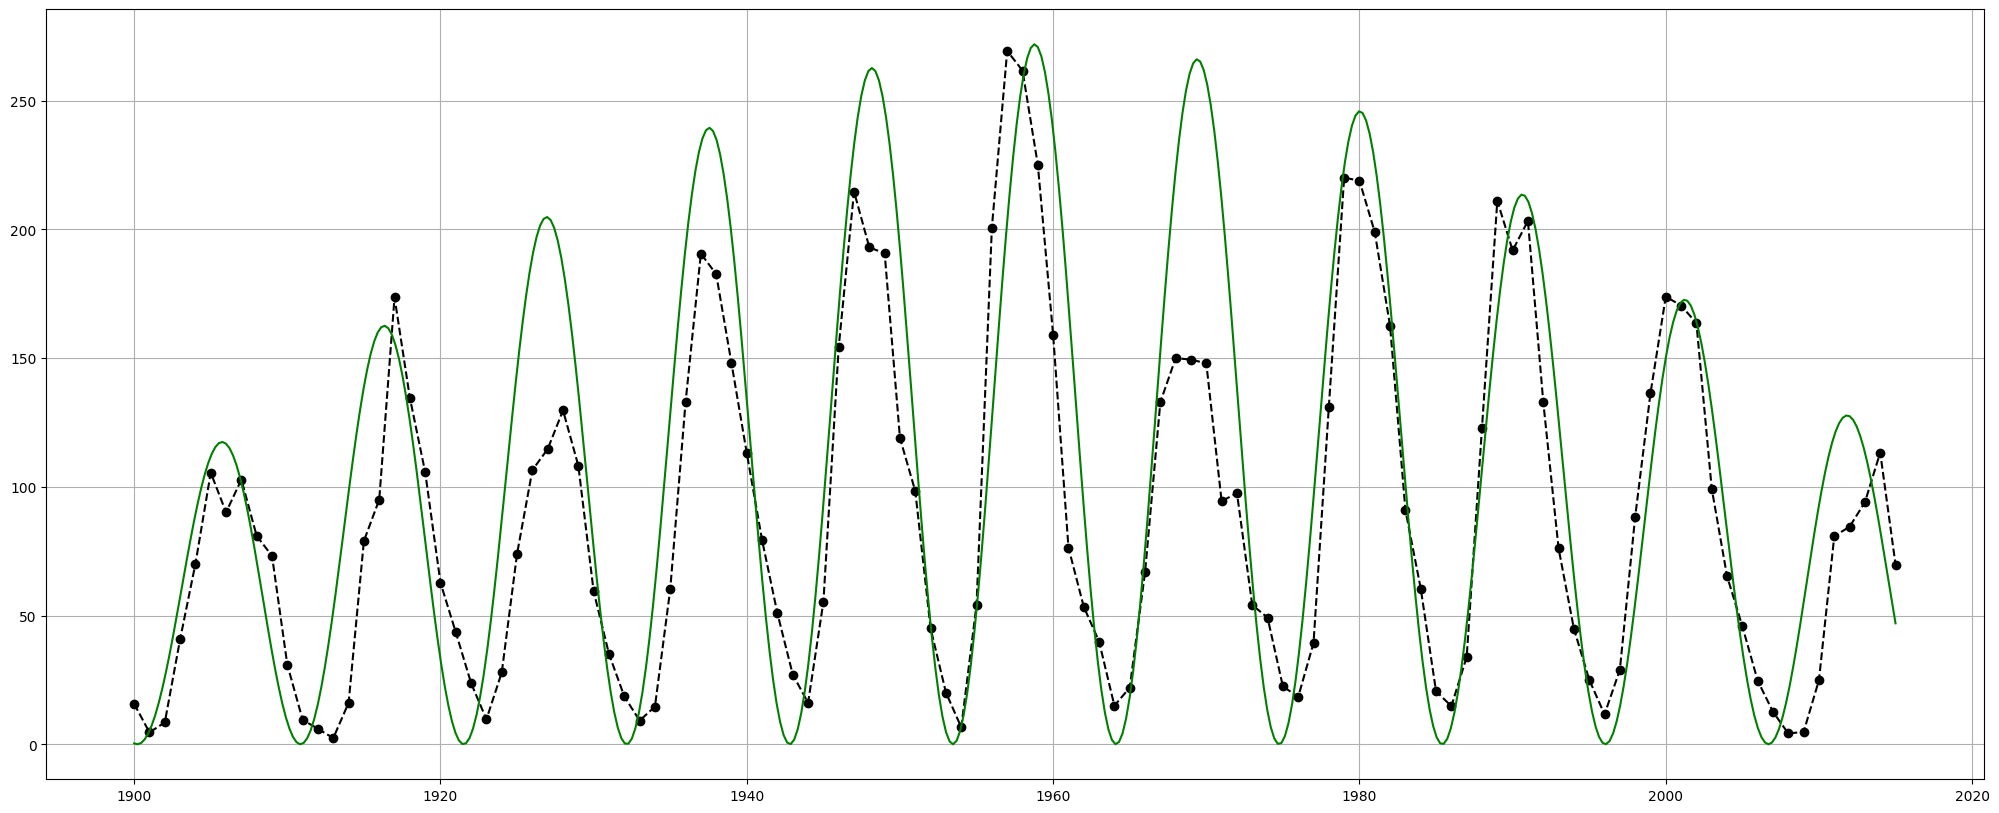

In [30]:
def f(x):
    return (np.sin((x - 1.33 + 1.5 * np.pi) * 0.59) + 1) * (np.sin((x - 1710) * np.pi * 0.01) + 1) * 68

x = np.linspace(1900, 2015, 500)
plt.figure(figsize=(25, 10))
plt.plot(years, temperature, "ko--")
plt.plot(x, f(x), "g-")
plt.grid()
pass

Так как из полученных ранее данных мы выяснили, что период колебаний солнечной активности равен примерно 10-11 годам, а последний пик солнечной активности приходился на 2014 год, то следующий пик солнечной активности будет в 2024-2025 годах

# Вывод
Ближайший пик солнечной активности будет наблюдаться в 2024-2025 году
